In [1]:
! pip install icartt

In [2]:
import icartt
import pathlib

In [3]:
icartt

<module 'icartt' from '/opt/conda/lib/python3.11/site-packages/icartt/__init__.py'>

In [4]:
# ict = icartt.Dataset("./FlightData_N57_20220828_RA.ict")
# ict = icartt.Dataset("./FlightData_N57_20220923_RA.ict")
ict = icartt.Dataset("FlightData_N57_20220906_RA.ict")

In [5]:
# read some metadata
print(ict.PIName)
print(ict.PIAffiliation)
print(ict.missionName)
print(ict.dataSourceDescription)
print(ict.dataID)
print(ict.locationID)
print("---")
print(ict.dateOfCollection)

Ken Aikin, Steven S. Brown
NOAA Chemical Sciences Laboratory
CalFiDE
AIMMS Probe
FlightData
N57
---
(2022, 9, 6)


In [6]:
# list variable names
[x for x in ict.variables]

['TO_Time_UTC',
 'AmbTemp',
 'RelHumidity',
 'StaticPrs',
 'VertWindSpd',
 'WindDir',
 'WindSpd',
 'Heading',
 'Pitch',
 'Roll',
 'TrueAirSpd',
 'GPSAlt',
 'GPSLat',
 'GPSLon']

In [7]:
# some info on a variable
print(ict.variables["GPSAlt"].units)
print(ict.variables["GPSAlt"].miss)

m
-9999


In [8]:
# get data column:
print(ict.data["TO_Time_UTC"])
print(ict.data["GPSAlt"])
print(type(ict.data))
print(ict.data)

[56040. 56041. 56042. ... 83218. 83219. 83220.]
[nan nan nan ... nan nan nan]
<class 'icartt.dataset.DataStore1001'>


In [9]:
# get all data (NumPy array):
ict.data[:]

array([(56040., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
       (56041., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
       (56042., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
       ...,
       (83218., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
       (83219., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
       (83220., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)],
      dtype=[('TO_Time_UTC', '<f8'), ('AmbTemp', '<f8'), ('RelHumidity', '<f8'), ('StaticPrs', '<f8'), ('VertWindSpd', '<f8'), ('WindDir', '<f8'), ('WindSpd', '<f8'), ('Heading', '<f8'), ('Pitch', '<f8'), ('Roll', '<f8'), ('TrueAirSpd', '<f8'), ('GPSAlt', '<f8'), ('GPSLat', '<f8'), ('GPSLon', '<f8')])

In [10]:
#create dataframes
import pandas as pd

df = pd.DataFrame(data=ict.data[:], columns=ict.variables.keys())

In [11]:
df

,TO_Time_UTC,AmbTemp,RelHumidity,StaticPrs,VertWindSpd,WindDir,WindSpd,Heading,Pitch,Roll,TrueAirSpd,GPSAlt,GPSLat,GPSLon
0,56040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56041.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56042.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56043.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,56044.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16438,83216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16439,83217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16440,83218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16441,83219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data cleaning and transformation


In [12]:
cleaned_df = df[["TO_Time_UTC", "GPSAlt", "GPSLat", "GPSLon", "Roll", "Heading", "Pitch"]]

In [13]:
cleaned_df.columns = ["timestamp", "altitude", "latitude", "longitude", "roll", "pitch", "heading"]
cleaned_df

,timestamp,altitude,latitude,longitude,roll,pitch,heading
0,56040.0,NaN,NaN,NaN,NaN,NaN,NaN
1,56041.0,NaN,NaN,NaN,NaN,NaN,NaN
2,56042.0,NaN,NaN,NaN,NaN,NaN,NaN
3,56043.0,NaN,NaN,NaN,NaN,NaN,NaN
4,56044.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
16438,83216.0,NaN,NaN,NaN,NaN,NaN,NaN
16439,83217.0,NaN,NaN,NaN,NaN,NaN,NaN
16440,83218.0,NaN,NaN,NaN,NaN,NaN,NaN
16441,83219.0,NaN,NaN,NaN,NaN,NaN,NaN


First off remove the NaN values from roll, pitch, heading

In [14]:
# Columns to check for NaN values
columns_to_check = ['roll', 'pitch', 'heading']

# Replace Nan Values with 0
cleaned_df = cleaned_df.fillna(0)

cleaned_df

,timestamp,altitude,latitude,longitude,roll,pitch,heading
0,56040.0,0.0,0.0,0.0,0.0,0.0,0.0
1,56041.0,0.0,0.0,0.0,0.0,0.0,0.0
2,56042.0,0.0,0.0,0.0,0.0,0.0,0.0
3,56043.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56044.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
16438,83216.0,0.0,0.0,0.0,0.0,0.0,0.0
16439,83217.0,0.0,0.0,0.0,0.0,0.0,0.0
16440,83218.0,0.0,0.0,0.0,0.0,0.0,0.0
16441,83219.0,0.0,0.0,0.0,0.0,0.0,0.0


Then change the timestamp from utc

In [15]:
year, month, day = ict.dateOfCollection

cleaned_df['timestamp'] = pd.to_datetime(cleaned_df['timestamp'], unit='s', origin=pd.Timestamp(f'{year}-{month}-{day}'))
cleaned_df['timestamp'] = cleaned_df['timestamp'].dt.tz_localize('UTC').dt.strftime('%Y-%m-%dT%H:%M:%SZ')

In [16]:
cleaned_df.shape

(16443, 7)

In [17]:
# sampled_data = cleaned_df[5000:9000]
sampled_data = cleaned_df
sampled_data

,timestamp,altitude,latitude,longitude,roll,pitch,heading
0,2022-09-06T15:34:00Z,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-09-06T15:34:01Z,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-09-06T15:34:02Z,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-09-06T15:34:03Z,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-09-06T15:34:04Z,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
16438,2022-09-06T23:06:56Z,0.0,0.0,0.0,0.0,0.0,0.0
16439,2022-09-06T23:06:57Z,0.0,0.0,0.0,0.0,0.0,0.0
16440,2022-09-06T23:06:58Z,0.0,0.0,0.0,0.0,0.0,0.0
16441,2022-09-06T23:06:59Z,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
sd = sampled_data

/tmp/ipykernel_8769/753052378.py:30: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  p2.plot(df_smooth['lon_smooth'], df_smooth['lat_smooth'], 'o-', label='Smoothed Path', linestyle='--')


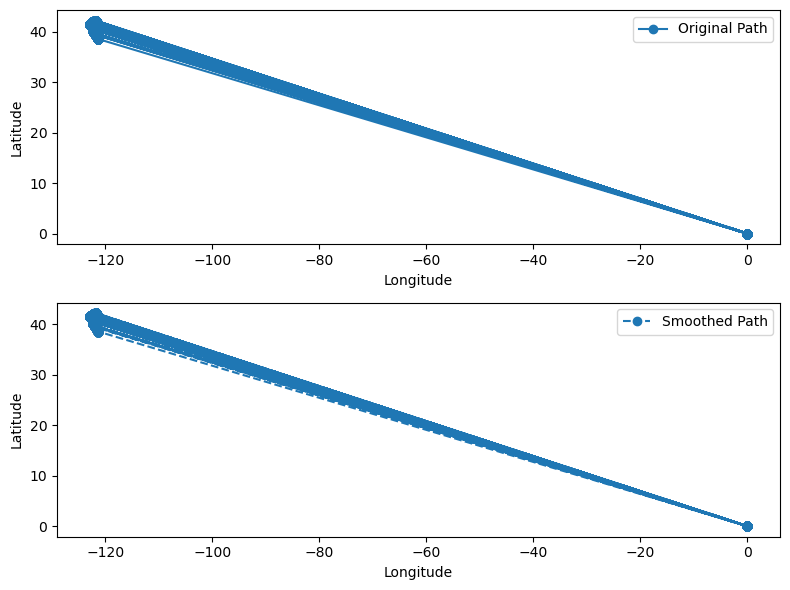

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Sample DataFrame
data = {
    'lon': sd['longitude'].to_numpy().tolist(),
    'lat': sd['latitude'].to_numpy().tolist()
}
df_smooth = pd.DataFrame(data)

# Apply Savitzky-Golay filter for smoothing
window_size = 3  # Must be odd number
poly_order = 2

df_smooth['lon_smooth'] = savgol_filter(df_smooth['lon'], window_size, poly_order)
df_smooth['lat_smooth'] = savgol_filter(df_smooth['lat'], window_size, poly_order)


# create subplots
fig, (p1, p2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot original and smoothed path
p1.plot(df_smooth['lon'], df_smooth['lat'], 'o-', label='Original Path')
p1.set_xlabel('Longitude')
p1.set_ylabel('Latitude')
p1.legend()

p2.plot(df_smooth['lon_smooth'], df_smooth['lat_smooth'], 'o-', label='Smoothed Path', linestyle='--')
p2.set_xlabel('Longitude')
p2.set_ylabel('Latitude')
p2.legend()

plt.tight_layout()
plt.show()

In [20]:
df_smooth.shape

(16443, 4)

In [21]:
sampled_data.shape

(16443, 7)

In [22]:
df_smooth

,lon,lat,lon_smooth,lat_smooth
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
16438,0.0,0.0,0.0,0.0
16439,0.0,0.0,0.0,0.0
16440,0.0,0.0,0.0,0.0
16441,0.0,0.0,0.0,0.0


In [23]:
sampled_data

,timestamp,altitude,latitude,longitude,roll,pitch,heading
0,2022-09-06T15:34:00Z,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-09-06T15:34:01Z,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-09-06T15:34:02Z,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-09-06T15:34:03Z,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-09-06T15:34:04Z,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
16438,2022-09-06T23:06:56Z,0.0,0.0,0.0,0.0,0.0,0.0
16439,2022-09-06T23:06:57Z,0.0,0.0,0.0,0.0,0.0,0.0
16440,2022-09-06T23:06:58Z,0.0,0.0,0.0,0.0,0.0,0.0
16441,2022-09-06T23:06:59Z,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#plugin the smoothed out value to the sampled dataframe, in order to generate the czml

In [25]:
# sampled_data.set_index(drop=True)
(sampled_data["longitude"])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16438    0.0
16439    0.0
16440    0.0
16441    0.0
16442    0.0
Name: longitude, Length: 16443, dtype: float64

In [26]:
print(df_smooth["lon_smooth"])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16438    0.0
16439    0.0
16440    0.0
16441    0.0
16442    0.0
Name: lon_smooth, Length: 16443, dtype: float64


In [27]:

sampled_data.loc[:, "longitude"] = df_smooth["lon_smooth"]
sampled_data.loc[:, "latitude"] = df_smooth["lat_smooth"]

In [28]:
sampled_data

,timestamp,altitude,latitude,longitude,roll,pitch,heading
0,2022-09-06T15:34:00Z,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-09-06T15:34:01Z,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-09-06T15:34:02Z,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-09-06T15:34:03Z,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-09-06T15:34:04Z,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
16438,2022-09-06T23:06:56Z,0.0,0.0,0.0,0.0,0.0,0.0
16439,2022-09-06T23:06:57Z,0.0,0.0,0.0,0.0,0.0,0.0
16440,2022-09-06T23:06:58Z,0.0,0.0,0.0,0.0,0.0,0.0
16441,2022-09-06T23:06:59Z,0.0,0.0,0.0,0.0,0.0,0.0


NAV CZML

In [29]:
# for abstract modules exposure
import sys

sys.path.append("../../src/")

for line in sys.path:
     # print(line)
    pass

In [30]:
from fcx_playground.fcx_dataprocess.czml_nav import NavCZMLDataProcess

In [31]:
obj = NavCZMLDataProcess()

In [32]:
czml_str = obj.prep_visualization(sampled_data)

In [33]:
# czml_str

In [34]:
# save the string to a new file

In [35]:
import os

tempdir = 'temp' 
if not os.path.exists(tempdir):
    os.makedirs(tempdir)
    
with open("temp/nav_czml.czml", "w") as czml_file:
    czml_file.write(czml_str)

In [36]:
# Display in Cesium

In [37]:
from fcx_playground.fcx_cesium_viz.czml_viz import CZMLViz

In [38]:
czml_viz_obj = CZMLViz()
nav_czml_cesium_html = czml_viz_obj.generate_html("http://localhost:8888/files/notebooks/czml/temp/nav_czml.czml?_xsrf=2%7Ca842e8cb%7Ca8382aa2558daeb930264de49bf98e35%7C1719500654")

In [39]:
# print(nav_czml_cesium_html)

In [40]:
import IPython.display

IPython.display.HTML(data = nav_czml_cesium_html)

In [41]:
# remove at the end of the notebook; needed for module exposure
sys.path.remove("../../src/")